# License 
***
Copyright (C) 2017 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

***
# R: Part 1 - data.table

## 1. Load library

`data.table` is an efficient package for manipulating data sets
* data.table is implemented in optimized C and often attempts to update items by reference to avoid copying large amounts of data
* data.table is a subclass of data.frame and generally accepts data.frame syntax 
* general form of a `data.table` is `dt[i, j, by]`
  * `i` is row index, indexed from 1 ...
  * `j` is col index, indexed from 1 ...
  * by is by-group var name

In [1]:
library(data.table)

***
## 2. Setting the working directory

#### Enter the directory location of this file within single quotes

In [2]:
# '<-' is the preferred assignment operator in R
# '/' is the safest directory separator character to use

git_dir <- 'C:/path/to/GWU_data_mining/01_basic_data_prep/src/notebooks/r'

#### Set the working directory

* The working directory is where files are written to and read from by default
* `setwd()` sets the working directory
* `getwd()` prints the current working directory

In [3]:
setwd(git_dir)
getwd()

[1] "C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks/r"

***
## 3. Generating a sample data set

#### Set the number of rows and columns for the sample data set

In [4]:
n_rows <- 1000
n_vars <- 2

#### Create a key variable
* A key variable has a unique value for each row of a data set
* `seq()` generates values from a number (default = 1), to another number, by a certain value (default = 1)
* Many types of data structures in R have key variables (a.k.a. row names) by default

In [5]:
key <- seq(n_rows)

#### Show the first five elements of `key`

Most data structures in R can be 'sliced', i.e. using numeric indices to select a subset of items 

In [6]:
key[1:5] 

[1] 1 2 3 4 5

#### Create lists of strings that will become column names

`paste()` concatentates strings with a separator character in between them

In [7]:
num_vars <- paste('numeric', seq_len(n_vars), sep = '')
num_vars 

char_vars <- paste('char', seq_len(n_vars), sep = '')
char_vars

[1] "numeric1" "numeric2"

[1] "char1" "char2"

#### Create a list of strings from which to generate random text variables
* `sapply()` applies a function to a sequence of values
* `LETTERS` is a character vector containing uppercase letters
* An anonymous function is defined that replicates a value 8 times with no seperator character

In [8]:
text_draw <- sapply(LETTERS[1:7],
                    FUN = function(x) paste(rep(x, 8), collapse = ""))
text_draw 

A          B          C          D          E          F          G 
"AAAAAAAA" "BBBBBBBB" "CCCCCCCC" "DDDDDDDD" "EEEEEEEE" "FFFFFFFF" "GGGGGGGG"

#### Create a sample `data.table`
* `replicate()` replicates `n_row` length lists of numeric values `n_vars` times
* `replicate()` replicates n_var lists of n_row elements from text_draw sampled randomly from `test_draw` using the `sample()` function

In [9]:
scratch_dt <- data.table(key,
                         replicate(n_vars, runif(n_rows)), 
                         replicate(n_vars, sample(text_draw, n_rows, 
                                                  replace = TRUE)))

The `data.table::set*` family of methods in data.table always updates items by reference for efficiency

In [10]:
setnames(scratch_dt, c('key', num_vars, char_vars))

Set option to print first 5 and last 5 rows of `data.table` by default

In [11]:
options(datatable.print.topn=5)
print(scratch_dt)

       key    numeric1   numeric2    char1    char2
   1:    1 0.259996684 0.46904710 GGGGGGGG EEEEEEEE
   2:    2 0.732081677 0.98525640 FFFFFFFF AAAAAAAA
   3:    3 0.003667001 0.44219657 FFFFFFFF CCCCCCCC
   4:    4 0.035518094 0.33271310 EEEEEEEE BBBBBBBB
   5:    5 0.634085899 0.39789319 EEEEEEEE FFFFFFFF
  ---                                              
 996:  996 0.149284828 0.06582848 CCCCCCCC GGGGGGGG
 997:  997 0.664694987 0.35249160 GGGGGGGG AAAAAAAA
 998:  998 0.119148107 0.66886333 DDDDDDDD GGGGGGGG
 999:  999 0.299141358 0.78567161 FFFFFFFF FFFFFFFF
1000: 1000 0.169459480 0.31053551 EEEEEEEE GGGGGGGG


***
## 4. Plotting variables in a table
`data.table` enables simple plotting for numeric variables

NULL

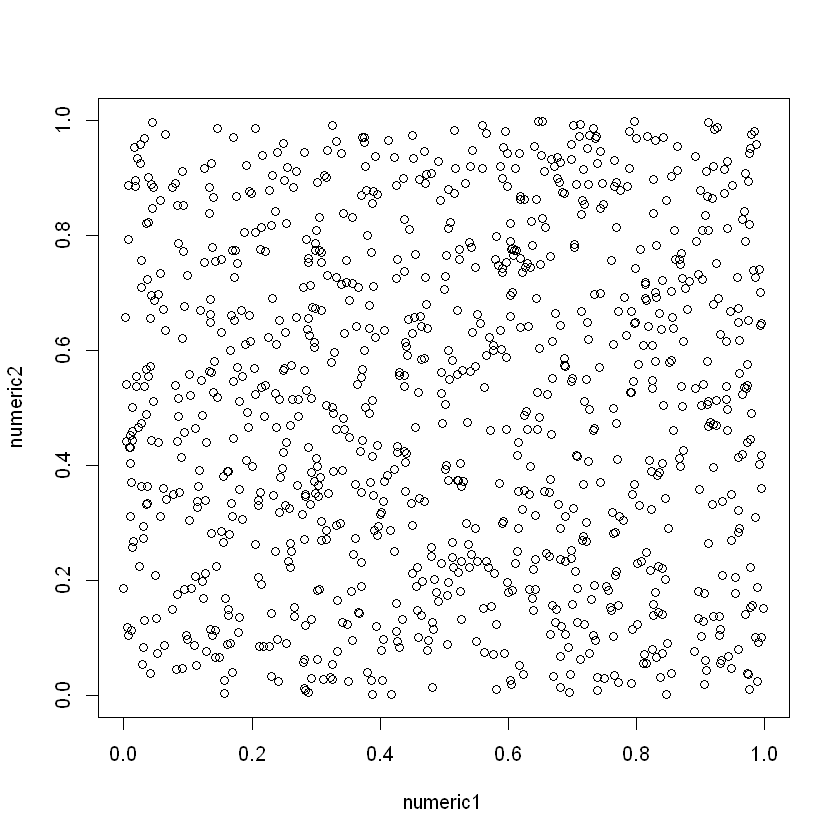

In [12]:
scratch_dt[,plot(numeric1, numeric2)]

***
## 5. Subsetting tables

### Subsetting a `data.table` by column

Selecting a single column results in a vector

In [13]:
class(scratch_dt[,char1])
length(scratch_dt[,char1])

[1] "character"

[1] 1000

##### Multiple columns can be selected

Specifying multiple columns by a vector results in a concatenated vector

In [14]:
class(scratch_dt[,c(numeric1, char1)])
length(scratch_dt[,c(numeric1, char1)])

[1] "character"

[1] 2000

Specifying multiple columns by list results in a `data.table`

In [15]:
class(scratch_dt[,list(numeric1, char1)])
print(scratch_dt[,list(numeric1, char1)])

[1] "data.table" "data.frame"

         numeric1    char1
   1: 0.259996684 GGGGGGGG
   2: 0.732081677 FFFFFFFF
   3: 0.003667001 FFFFFFFF
   4: 0.035518094 EEEEEEEE
   5: 0.634085899 EEEEEEEE
  ---                     
 996: 0.149284828 CCCCCCCC
 997: 0.664694987 GGGGGGGG
 998: 0.119148107 DDDDDDDD
 999: 0.299141358 FFFFFFFF
1000: 0.169459480 EEEEEEEE


'.' is an alias for 'list'

In [16]:
class(scratch_dt[,.(numeric1, char1)] )
print(scratch_dt[,.(numeric1, char1)])

[1] "data.table" "data.frame"

         numeric1    char1
   1: 0.259996684 GGGGGGGG
   2: 0.732081677 FFFFFFFF
   3: 0.003667001 FFFFFFFF
   4: 0.035518094 EEEEEEEE
   5: 0.634085899 EEEEEEEE
  ---                     
 996: 0.149284828 CCCCCCCC
 997: 0.664694987 GGGGGGGG
 998: 0.119148107 DDDDDDDD
 999: 0.299141358 FFFFFFFF
1000: 0.169459480 EEEEEEEE


##### Computed columns

Compute a standalone vector and display first five elements

In [17]:
scratch_dt[1:5, round(numeric1, 1)] # compute standalone vector

[1] 0.3 0.7 0.0 0.0 0.6

Compute a new column with assigned name

In [18]:
print(scratch_dt[, .(new_numeric = round(numeric1, 1))]) # assign name

      new_numeric
   1:         0.3
   2:         0.7
   3:         0.0
   4:         0.0
   5:         0.6
  ---            
 996:         0.1
 997:         0.7
 998:         0.1
 999:         0.3
1000:         0.2


### Subsetting a `data.table` by row

Use numeric indices (or 'slicing')

In [19]:
scratch_dt[3:5]

key,numeric1,numeric2,char1,char2
3,0.003667001,0.4421966,FFFFFFFF,CCCCCCCC
4,0.035518094,0.3327131,EEEEEEEE,BBBBBBBB
5,0.634085899,0.3978932,EEEEEEEE,FFFFFFFF


In [20]:
scratch_dt[3:5,] # comma is optional

key,numeric1,numeric2,char1,char2
3,0.003667001,0.4421966,FFFFFFFF,CCCCCCCC
4,0.035518094,0.3327131,EEEEEEEE,BBBBBBBB
5,0.634085899,0.3978932,EEEEEEEE,FFFFFFFF


Use variable values

In [21]:
print(scratch_dt[char1 == 'DDDDDDDD'])

     key   numeric1   numeric2    char1    char2
  1:  18 0.77342184 0.31187663 DDDDDDDD CCCCCCCC
  2:  25 0.32552511 0.02781991 DDDDDDDD EEEEEEEE
  3:  29 0.67213389 0.91959072 DDDDDDDD GGGGGGGG
  4:  42 0.12872212 0.44037910 DDDDDDDD EEEEEEEE
  5:  44 0.28204772 0.94455718 DDDDDDDD AAAAAAAA
 ---                                            
127: 964 0.03882007 0.90117101 DDDDDDDD CCCCCCCC
128: 968 0.06489768 0.97608891 DDDDDDDD DDDDDDDD
129: 969 0.82980244 0.70093445 DDDDDDDD BBBBBBBB
130: 970 0.30456941 0.77411254 DDDDDDDD CCCCCCCC
131: 998 0.11914811 0.66886333 DDDDDDDD GGGGGGGG


In [22]:
print(scratch_dt[char1 %in% c('DDDDDDDD', 'EEEEEEEE')])

      key   numeric1  numeric2    char1    char2
  1:    4 0.03551809 0.3327131 EEEEEEEE BBBBBBBB
  2:    5 0.63408590 0.3978932 EEEEEEEE FFFFFFFF
  3:   11 0.84197527 0.5039631 EEEEEEEE CCCCCCCC
  4:   14 0.50103007 0.7063631 EEEEEEEE AAAAAAAA
  5:   16 0.09726815 0.1038322 EEEEEEEE AAAAAAAA
 ---                                            
277:  979 0.31631015 0.8999229 EEEEEEEE BBBBBBBB
278:  984 0.38788661 0.5133926 EEEEEEEE EEEEEEEE
279:  987 0.54909619 0.7445486 EEEEEEEE FFFFFFFF
280:  998 0.11914811 0.6688633 DDDDDDDD GGGGGGGG
281: 1000 0.16945948 0.3105355 EEEEEEEE GGGGGGGG


##### .N operator
* Used in `i` (i.e. as a row  index) `.N` represents the numeric value of the last row of a `data.table`
* Used in `j` (i.e. as a column index) `.N` represents the number of rows in a `data.table`

In [23]:
scratch_dt[.N]

key,numeric1,numeric2,char1,char2
1000,0.1694595,0.3105355,EEEEEEEE,GGGGGGGG


In [24]:
scratch_dt[,.N]

[1] 1000

***
## 6. Sorting a table 

`data.table::setorder` reorders columns by reference

In [25]:
sorted <- setorder(scratch_dt, char1)
print(sorted)

      key   numeric1    numeric2    char1    char2
   1:  35 0.69515565 0.004905779 AAAAAAAA AAAAAAAA
   2:  47 0.37059339 0.869991876 AAAAAAAA BBBBBBBB
   3:  51 0.04640185 0.883355444 AAAAAAAA DDDDDDDD
   4:  53 0.36996356 0.423926687 AAAAAAAA AAAAAAAA
   5:  59 0.36241661 0.642012189 AAAAAAAA CCCCCCCC
  ---                                             
 996: 931 0.41697288 0.001541809 GGGGGGGG GGGGGGGG
 997: 956 0.03146415 0.537123892 GGGGGGGG AAAAAAAA
 998: 977 0.94039200 0.537894669 GGGGGGGG EEEEEEEE
 999: 982 0.68691456 0.586067937 GGGGGGGG FFFFFFFF
1000: 997 0.66469499 0.352491600 GGGGGGGG AAAAAAAA


When used in `data.table`, `order()` also reorders columns by reference

In [26]:
sorted <- scratch_dt[order(char1)]
print(sorted)

      key   numeric1    numeric2    char1    char2
   1:  35 0.69515565 0.004905779 AAAAAAAA AAAAAAAA
   2:  47 0.37059339 0.869991876 AAAAAAAA BBBBBBBB
   3:  51 0.04640185 0.883355444 AAAAAAAA DDDDDDDD
   4:  53 0.36996356 0.423926687 AAAAAAAA AAAAAAAA
   5:  59 0.36241661 0.642012189 AAAAAAAA CCCCCCCC
  ---                                             
 996: 931 0.41697288 0.001541809 GGGGGGGG GGGGGGGG
 997: 956 0.03146415 0.537123892 GGGGGGGG AAAAAAAA
 998: 977 0.94039200 0.537894669 GGGGGGGG EEEEEEEE
 999: 982 0.68691456 0.586067937 GGGGGGGG FFFFFFFF
1000: 997 0.66469499 0.352491600 GGGGGGGG AAAAAAAA


Sort orders can be specified by using `order()`

In [27]:
sorted2 <- scratch_dt[order(char1, -numeric1)]
print(sorted2)

      key    numeric1   numeric2    char1    char2
   1: 361 0.988891296 0.02420181 AAAAAAAA DDDDDDDD
   2:  95 0.988878589 0.18766972 AAAAAAAA GGGGGGGG
   3: 848 0.985371143 0.72682615 AAAAAAAA AAAAAAAA
   4: 108 0.977229631 0.22178106 AAAAAAAA DDDDDDDD
   5: 826 0.973477794 0.57627465 AAAAAAAA EEEEEEEE
  ---                                             
 996: 414 0.026325888 0.95853580 GGGGGGGG EEEEEEEE
 997: 210 0.011404102 0.37012387 GGGGGGGG DDDDDDDD
 998: 750 0.010638036 0.31127618 GGGGGGGG AAAAAAAA
 999: 649 0.007135095 0.10497346 GGGGGGGG BBBBBBBB
1000: 518 0.006429464 0.11806816 GGGGGGGG FFFFFFFF


#### data.table::setkey
* Reorders columns by reference by the specified key variable (here called 'key')
* Sets the variable to the key of the data.table for future operations
* Subsetting and selecting by the key variable will be more efficient in future operations    

In [28]:
sorted3 <- setkey(scratch_dt, key)
print(sorted3)

       key    numeric1   numeric2    char1    char2
   1:    1 0.259996684 0.46904710 GGGGGGGG EEEEEEEE
   2:    2 0.732081677 0.98525640 FFFFFFFF AAAAAAAA
   3:    3 0.003667001 0.44219657 FFFFFFFF CCCCCCCC
   4:    4 0.035518094 0.33271310 EEEEEEEE BBBBBBBB
   5:    5 0.634085899 0.39789319 EEEEEEEE FFFFFFFF
  ---                                              
 996:  996 0.149284828 0.06582848 CCCCCCCC GGGGGGGG
 997:  997 0.664694987 0.35249160 GGGGGGGG AAAAAAAA
 998:  998 0.119148107 0.66886333 DDDDDDDD GGGGGGGG
 999:  999 0.299141358 0.78567161 FFFFFFFF FFFFFFFF
1000: 1000 0.169459480 0.31053551 EEEEEEEE GGGGGGGG


***
## 7. Updating a table

#### Update rows by reference using the := operator
##### (data.table supports overwrite of data)

In [29]:
scratch_dt2 <- scratch_dt[key > 500, char1 := 'ZZZZZZZZ']
print(scratch_dt2)

       key    numeric1   numeric2    char1    char2
   1:    1 0.259996684 0.46904710 GGGGGGGG EEEEEEEE
   2:    2 0.732081677 0.98525640 FFFFFFFF AAAAAAAA
   3:    3 0.003667001 0.44219657 FFFFFFFF CCCCCCCC
   4:    4 0.035518094 0.33271310 EEEEEEEE BBBBBBBB
   5:    5 0.634085899 0.39789319 EEEEEEEE FFFFFFFF
  ---                                              
 996:  996 0.149284828 0.06582848 ZZZZZZZZ GGGGGGGG
 997:  997 0.664694987 0.35249160 ZZZZZZZZ AAAAAAAA
 998:  998 0.119148107 0.66886333 ZZZZZZZZ GGGGGGGG
 999:  999 0.299141358 0.78567161 ZZZZZZZZ FFFFFFFF
1000: 1000 0.169459480 0.31053551 ZZZZZZZZ GGGGGGGG


#### Create new columns by reference using the := operator

In [30]:
head(scratch_dt2[, new_numeric := round(numeric1, 1)])

key,numeric1,numeric2,char1,char2,new_numeric
1,0.259996684,0.4690471,GGGGGGGG,EEEEEEEE,0.3
2,0.732081677,0.9852564,FFFFFFFF,AAAAAAAA,0.7
3,0.003667001,0.4421966,FFFFFFFF,CCCCCCCC,0.0
4,0.035518094,0.3327131,EEEEEEEE,BBBBBBBB,0.0
5,0.634085899,0.3978932,EEEEEEEE,FFFFFFFF,0.6
6,0.958804426,0.4134339,FFFFFFFF,CCCCCCCC,1.0


## 8. Adding data to the table

Use `data.table::rbindlist` to stack `data.tables` vertically

In [31]:
bindr <- rbindlist(list(sorted, sorted2))
nrow(bindr)

[1] 2000

#### `data.table::merge` joins tables side-by-side using a common key (or 'by') variable 
* Joining data.tables without prespecified keys (i.e. by using data.table::setkey) requires that a key for the join be specified
* joining data.tables with prespecified keys does not require that a key be specified when data.table::merge is called
* The prefix 'x.' is added to the left table variable names by default
* The prefix 'y.' is added to the right table variables names by default

In [32]:
joined1 <- merge(sorted, sorted2, by = c('key'))
print(joined1)

       key  numeric1.x numeric2.x  char1.x  char2.x  numeric1.y numeric2.y
   1:    1 0.259996684 0.46904710 GGGGGGGG EEEEEEEE 0.259996684 0.46904710
   2:    2 0.732081677 0.98525640 FFFFFFFF AAAAAAAA 0.732081677 0.98525640
   3:    3 0.003667001 0.44219657 FFFFFFFF CCCCCCCC 0.003667001 0.44219657
   4:    4 0.035518094 0.33271310 EEEEEEEE BBBBBBBB 0.035518094 0.33271310
   5:    5 0.634085899 0.39789319 EEEEEEEE FFFFFFFF 0.634085899 0.39789319
  ---                                                                     
 996:  996 0.149284828 0.06582848 CCCCCCCC GGGGGGGG 0.149284828 0.06582848
 997:  997 0.664694987 0.35249160 GGGGGGGG AAAAAAAA 0.664694987 0.35249160
 998:  998 0.119148107 0.66886333 DDDDDDDD GGGGGGGG 0.119148107 0.66886333
 999:  999 0.299141358 0.78567161 FFFFFFFF FFFFFFFF 0.299141358 0.78567161
1000: 1000 0.169459480 0.31053551 EEEEEEEE GGGGGGGG 0.169459480 0.31053551
       char1.y  char2.y
   1: GGGGGGGG EEEEEEEE
   2: FFFFFFFF AAAAAAAA
   3: FFFFFFFF CCCCCCCC
   4

Add a key to the `scratch_dt2` table

In [33]:
scratch_dt2 <- setkey(scratch_dt2[,.(key, char1, new_numeric)], key)
print(scratch_dt2)

       key    char1 new_numeric
   1:    1 GGGGGGGG         0.3
   2:    2 FFFFFFFF         0.7
   3:    3 FFFFFFFF         0.0
   4:    4 EEEEEEEE         0.0
   5:    5 EEEEEEEE         0.6
  ---                          
 996:  996 ZZZZZZZZ         0.1
 997:  997 ZZZZZZZZ         0.7
 998:  998 ZZZZZZZZ         0.1
 999:  999 ZZZZZZZZ         0.3
1000: 1000 ZZZZZZZZ         0.2


Now `sorted3` and `scratch_dt2` can be joined without specifiying a key

In [34]:
joined2 <- merge(sorted3, scratch_dt2)
print(joined2)

       key    numeric1   numeric2  char1.x    char2 new_numeric.x  char1.y
   1:    1 0.259996684 0.46904710 GGGGGGGG EEEEEEEE           0.3 GGGGGGGG
   2:    2 0.732081677 0.98525640 FFFFFFFF AAAAAAAA           0.7 FFFFFFFF
   3:    3 0.003667001 0.44219657 FFFFFFFF CCCCCCCC           0.0 FFFFFFFF
   4:    4 0.035518094 0.33271310 EEEEEEEE BBBBBBBB           0.0 EEEEEEEE
   5:    5 0.634085899 0.39789319 EEEEEEEE FFFFFFFF           0.6 EEEEEEEE
  ---                                                                     
 996:  996 0.149284828 0.06582848 ZZZZZZZZ GGGGGGGG           0.1 ZZZZZZZZ
 997:  997 0.664694987 0.35249160 ZZZZZZZZ AAAAAAAA           0.7 ZZZZZZZZ
 998:  998 0.119148107 0.66886333 ZZZZZZZZ GGGGGGGG           0.1 ZZZZZZZZ
 999:  999 0.299141358 0.78567161 ZZZZZZZZ FFFFFFFF           0.3 ZZZZZZZZ
1000: 1000 0.169459480 0.31053551 ZZZZZZZZ GGGGGGGG           0.2 ZZZZZZZZ
      new_numeric.y
   1:           0.3
   2:           0.7
   3:           0.0
   4:           0.0


***
## 9. By group processing
* By groups allow you to divide and process a data set based on the values of a certain variable
* General form of a `data.table` is `dt[i, j, by]`, where `by` is by group variable name

In [35]:
scratch_dt2[, sum(new_numeric), by = char1]
scratch_dt2[1:500, sum(new_numeric), by = char1]

char1,V1
GGGGGGGG,41.4
FFFFFFFF,31.9
EEEEEEEE,38.0
CCCCCCCC,41.5
BBBBBBBB,31.6
DDDDDDDD,28.8
AAAAAAAA,41.5
ZZZZZZZZ,247.6


char1,V1
GGGGGGGG,41.4
FFFFFFFF,31.9
EEEEEEEE,38.0
CCCCCCCC,41.5
BBBBBBBB,31.6
DDDDDDDD,28.8
AAAAAAAA,41.5


#### `.N` returns the number of rows in each by group

In [36]:
scratch_dt2[, .N, by = char1] 

char1,N
GGGGGGGG,83
FFFFFFFF,66
EEEEEEEE,77
CCCCCCCC,85
BBBBBBBB,59
DDDDDDDD,57
AAAAAAAA,73
ZZZZZZZZ,500


#### by groups can also be a list of variables

In [37]:
two_by_vars <- scratch_dt[, mean(new_numeric), by = .(char1, char2)]
two_by_vars[order(char1, char2)]

char1,char2,V1
AAAAAAAA,AAAAAAAA,0.4700000
AAAAAAAA,BBBBBBBB,0.5166667
AAAAAAAA,CCCCCCCC,0.5666667
AAAAAAAA,DDDDDDDD,0.5928571
AAAAAAAA,EEEEEEEE,0.7250000
AAAAAAAA,FFFFFFFF,0.5727273
AAAAAAAA,GGGGGGGG,0.5923077
BBBBBBBB,AAAAAAAA,0.5833333
BBBBBBBB,BBBBBBBB,0.6900000
BBBBBBBB,CCCCCCCC,0.4727273


#### `.SD` represents all the variables except the by variable(s)

In [38]:
scratch_dt2[, lapply(.SD, base::sum), by = char1]

char1,key,new_numeric
GGGGGGGG,21394,41.4
FFFFFFFF,15475,31.9
EEEEEEEE,18120,38.0
CCCCCCCC,21529,41.5
BBBBBBBB,13509,31.6
DDDDDDDD,15001,28.8
AAAAAAAA,20222,41.5
ZZZZZZZZ,375250,247.6


#### `.N` can be used to find the first and last rows of each by group

In [39]:
scratch_dt2[, .SD[c(1, .N)], by = char1]

char1,key,new_numeric
GGGGGGGG,1,0.3
GGGGGGGG,500,0.6
FFFFFFFF,2,0.7
FFFFFFFF,485,0.5
EEEEEEEE,4,0.0
EEEEEEEE,490,0.1
CCCCCCCC,8,0.1
CCCCCCCC,498,0.6
BBBBBBBB,12,0.1
BBBBBBBB,496,0.3


***
## 10. Operation chaining
Operations can be chained for more concise syntax

In [40]:
# chaining - one line of code
scratch_dt2[, .(new_numeric2 = sum(new_numeric)), by = char1][new_numeric2 > 40]

char1,new_numeric2
GGGGGGGG,41.4
CCCCCCCC,41.5
AAAAAAAA,41.5
ZZZZZZZZ,247.6


In [41]:
# no chaining - two lines of code
scratch_dt3 <- scratch_dt2[, .(new_numeric2 = sum(new_numeric)), by = char1]
scratch_dt3[new_numeric2 > 40]

char1,new_numeric2
GGGGGGGG,41.4
CCCCCCCC,41.5
AAAAAAAA,41.5
ZZZZZZZZ,247.6


***
## 11. Transposing a table
* Transposing a matrix simply switches row and columns values
* Transposing a data.frame or data.table is more complex because of metadata associated with variable names and row indices

In [42]:
transposed = t(scratch_dt)
str(transposed)

 chr [1:6, 1:1000] "   1" "0.2599966838" "0.469047098" "GGGGGGGG" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:6] "key" "numeric1" "numeric2" "char1" ...
  ..$ : NULL


Often, instead of simply transposing, a data set will need to be reformatted in a **melt/stack** - **column split** - **cast** action described in Hadley Wickham's *Tidy Data*:
https://www.jstatsoft.org/article/view/v059i10

See also dcast.data.table and melt.data.table

***
## 12. Exporting and importing a table

`data.table::fread` and `data.table::fwrite` allow for optimized file i/o
* `fwrite` only availabe in data.table version > 1.9.7
* available from http://Rdatatable.github.io/data.table

In [42]:
# use fwrite to write a file 
fwrite(scratch_dt, 'scratch.csv')

In [43]:
# use fread to read a file
scratch_dt <- fread('scratch.csv')
print(scratch_dt)

       key   numeric1    numeric2    char1    char2 new_numeric
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF         0.5
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD         0.4
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA         0.7
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC         0.6
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC         0.1
  ---                                                          
 996:  996 0.49468994 0.908724921 ZZZZZZZZ EEEEEEEE         0.5
 997:  997 0.07238554 0.560199407 ZZZZZZZZ GGGGGGGG         0.1
 998:  998 0.03046075 0.008601266 ZZZZZZZZ GGGGGGGG         0.0
 999:  999 0.12894029 0.381171830 ZZZZZZZZ BBBBBBBB         0.1
1000: 1000 0.93970260 0.632544576 ZZZZZZZZ FFFFFFFF         0.9
